In [3]:
#   ***Libraries***
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# linear model

In [4]:
train_df=pd.read_csv("C:/Users/Aniket/Downloads/neural-nets-master/neural-nets-master/examples/linear/data/train.csv")

In [5]:
print(train_df.head())

          x         y  color
0  1.146728  2.233629    0.0
1  3.676886  4.520687    0.0
2  0.730671  1.426260    0.0
3  1.950790  3.145987    0.0
4  4.323010  5.320534    0.0


In [6]:
x_train=np.column_stack((train_df.x.values,train_df.y.values))
y_train=train_df.color.values

In [7]:
print(x_train.shape)
print(y_train.shape)

(4000, 2)
(4000,)


In [8]:
y_train[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
# setting up the neural networks
model=keras.Sequential([keras.layers.Dense(8,input_shape=(2,),activation='relu'),keras.layers.Dense(1,activation='sigmoid')])

#setting optimisers and reducing loss functions
model.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(from_logits=False), metrics=['accuracy'])

model.summary()
#training , fitting and validating data
model.fit(x_train,y_train,batch_size=4,epochs=5)

test_df= pd.read_csv("C:/Users/Aniket/Downloads/neural-nets-master/neural-nets-master/examples/linear/data/test.csv")
test_x=np.column_stack((test_df.x.values,test_df.y.values))
print("evaluated results")
model.evaluate(test_x,test_df.color.values)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1000/1000 [==============================] - 5s 2ms/step - loss: 0.3051 - accuracy: 0.9528
Epoch 2/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0551 - accuracy: 0.9992
Epoch 3/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0211 - accuracy: 1.0000
Epoch 4/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0103 - accuracy: 1.0000
Epoch 5/5
1000/1000 [==============================]

[0.004300403408706188, 1.0]

In [10]:
y_prd=model.predict(test_x)

32/32 [==============================] - 0s 2ms/step


# # for Quadratic dataset model


In [11]:
train_df=pd.read_csv("C:/Users/Aniket/Downloads/neural-nets-master/neural-nets-master/examples/quadratic/data/train.csv")
print(train_df.head())

          x          y  color
0 -4.956506  25.706334    0.0
1  2.897218  10.359784    0.0
2 -4.488273  22.113311    0.0
3  3.823152  15.665060    0.0
4  4.425201  21.118726    0.0


In [12]:
x_train=np.column_stack((train_df.x.values,train_df.y.values))
y_train=train_df.color.values
print(x_train.shape)
print(y_train.shape)

(4000, 2)
(4000,)


In [13]:
model=keras.Sequential([keras.layers.Dense(32,input_shape=(2,),activation='relu'),keras.layers.Dense(1,activation='sigmoid')])

#setting optimisers and reducing loss functions
model.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(from_logits=False), metrics=['accuracy'])


#training , fitting and validating data
model.fit(x_train,y_train,batch_size=4,epochs=5)

test_df= pd.read_csv("C:/Users/Aniket/Downloads/neural-nets-master/neural-nets-master/examples/quadratic/data/test.csv")
test_x=np.column_stack((test_df.x.values,test_df.y.values))
print("evaluated results")
model.evaluate(test_x,test_df.color.values)

Epoch 1/5
1000/1000 [==============================] - 3s 2ms/step - loss: 0.5856 - accuracy: 0.7555
Epoch 2/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4441 - accuracy: 0.8533
Epoch 3/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3729 - accuracy: 0.8758
Epoch 4/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3198 - accuracy: 0.9013
Epoch 5/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2588 - accuracy: 0.9385
evaluated results
32/32 [==============================] - 0s 2ms/step - loss: 0.2219 - accuracy: 0.9780


[0.22190648317337036, 0.9779999852180481]

32/32 [==============================] - 0s 2ms/step


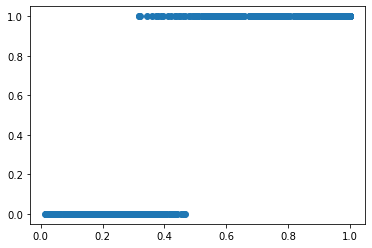

In [14]:
y_prd=model.predict(test_x)
plt.scatter(y_prd,test_df.color.values)

# Clusters

In [15]:
train_df=pd.read_csv("C:/Users/Aniket/Downloads/neural-nets-master/neural-nets-master/examples/clusters/data/train.csv")

x_train=np.column_stack((train_df.x.values,train_df.y.values))
#print(train_df.color.unique())
color_dict={'red': 0,'blue': 1,'green': 2,'teal': 3,'orange': 4,'purple': 5}
train_df.color=train_df.color.apply(lambda x:color_dict[x])

y_train=train_df.color.values
#print(train_df.head())
print(x_train.shape)
print(y_train.shape)

(6000, 2)
(6000,)


In [16]:
model=keras.Sequential(([keras.layers.Dense(32,input_shape=(2,),activation='relu'),keras.layers.Dense(16,activation='relu'),
                        keras.layers.Dense(6,activation='sigmoid')]))

#setting optimisers and reducing loss functions
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


#training , fitting and validating data
model.fit(x_train,y_train,batch_size=4,epochs=6)

test_df= pd.read_csv("C:/Users/Aniket/Downloads/neural-nets-master/neural-nets-master/examples/clusters/data/test.csv")

color_dict={'red': 0,'blue': 1,'green': 2,'teal': 3,'orange': 4,'purple': 5}
test_df.color=test_df.color.apply(lambda x:color_dict[x])
test_x=np.column_stack((test_df.x.values,test_df.y.values))


print("evaluated results")
model.evaluate(test_x,test_df.color.values)

Epoch 1/6
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6141 - accuracy: 0.7948
Epoch 2/6
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1871 - accuracy: 0.9460
Epoch 3/6
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1330 - accuracy: 0.9655
Epoch 4/6
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1109 - accuracy: 0.9687
Epoch 5/6
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0973 - accuracy: 0.9705
Epoch 6/6
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0889 - accuracy: 0.9740
evaluated results
38/38 [==============================] - 0s 2ms/step - loss: 0.0814 - accuracy: 0.9700


[0.08143080770969391, 0.9700000286102295]

In [17]:
a=model.predict(np.array([[-2.5,3]]))
print(np.round(a))

1/1 [==============================] - 0s 80ms/step
[[0. 0. 0. 0. 1. 0.]]


# Complex model

In [18]:
train_df=pd.read_csv("C:/Users/Aniket/Downloads/neural-nets-master/neural-nets-master/examples/complex/data/train.csv")
print(train_df.head())
x_train=np.column_stack((train_df.x.values,train_df.y.values))
y_train=train_df.color.values
print(x_train.shape)
print(y_train.shape)

          x         y  color
0  2.375386 -2.151675    0.0
1  0.155175 -3.939919    1.0
2  0.580631 -2.425793    1.0
3  2.045291 -2.755232    0.0
4  0.637783 -1.396165    1.0
(20000, 2)
(20000,)


In [19]:
test_df= pd.read_csv("C:/Users/Aniket/Downloads/neural-nets-master/neural-nets-master/examples/complex/data/test.csv")
test_x=np.column_stack((test_df.x.values,test_df.y.values))


model=keras.Sequential(([keras.layers.Dense(256,input_shape=(2,),activation='relu'),
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(128,activation='relu'),
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(128,activation='relu'),
                         keras.layers.Dense(1,activation='sigmoid')]))

#setting optimisers and reducing loss functions
model.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(from_logits=False), metrics=['accuracy'])


#training , fitting and validating data
model.fit(x_train,y_train,batch_size=16,epochs=10,validation_data=(test_x,test_df.color.values))

print("evaluated results")
model.evaluate(test_x,test_df.color.values)

Epoch 1/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.6055 - accuracy: 0.6530 - val_loss: 0.5508 - val_accuracy: 0.7272
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.5263 - accuracy: 0.7414 - val_loss: 0.4706 - val_accuracy: 0.7786
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4716 - accuracy: 0.7781 - val_loss: 0.4428 - val_accuracy: 0.8140
Epoch 4/10
1250/1250 [==============================] - 4s 4ms/step - loss: 0.4449 - accuracy: 0.7882 - val_loss: 0.4256 - val_accuracy: 0.7996
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4219 - accuracy: 0.7992 - val_loss: 0.3775 - val_accuracy: 0.8256
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4029 - accuracy: 0.8108 - val_loss: 0.3634 - val_accuracy: 0.8276
Epoch 7/10
1250/1250 [==============================] - 4s 4ms/step - loss: 0.3896 - accuracy: 0.8158 - val_loss: 0.3498 - val_accuracy:

[0.29772794246673584, 0.8773999810218811]

In [20]:
y_prd=model.predict(test_x)

157/157 [==============================] - 0s 2ms/step


In [21]:
print(np.round(y_prd))

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]
